<a target="_blank" href="https://colab.research.google.com/github/paulotguerra/QXD0178/blob/main/01.E0-Excercicio-Limpeza-de-dados.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

## QXD0178 - Mineração de Dados
# Preparação da base de dados

**Professor:** Paulo de Tarso Guerra Oliveira ([paulodetarso@ufc.br](mailto:paulodetarso@ufc.br))


# Lista de Exercícios: Limpeza de dados

Nesta lista de exercícios, você será deverá aplicar técnicas de processamento de dados e limpeza de dados para lidar com problemas comuns encontrados em conjuntos de dados do mundo real. Aplique as técnicas aprendidas na disciplina de Mineração de Dados para tratar dados faltantes e inconsistências, tornando os dados prontos para análises subsequentes.

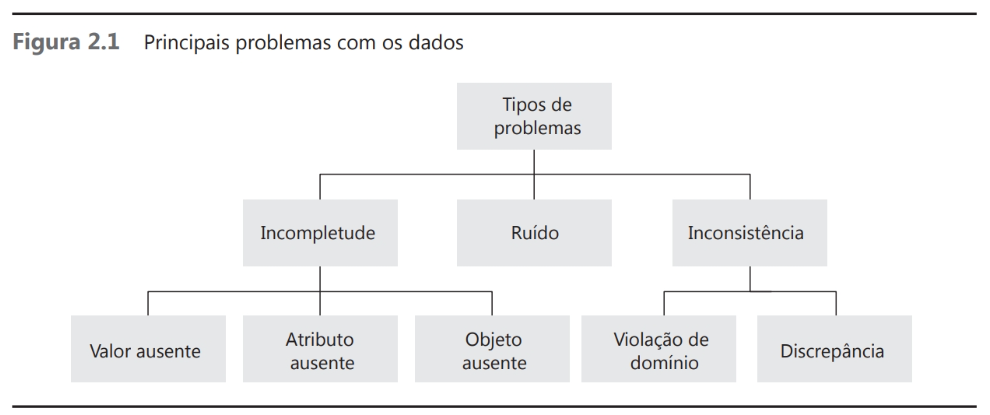

Para este exercícios será utilizada a base de dados [Food choices: College students' food and cooking preferences](https://www.kaggle.com/datasets/borapajo/food-choices?select=food_coded.csv) que contém informações sobre hábitos alimentares de um conjunto de estudantes.


Este conjunto de dados possui valores ausentes em várias colunas. Sua tarefa é:

1. Identificar todas as colunas com dados faltantes.
1. Escolher a estratégia apropriada para tratar cada tipo de dado faltante (exemplo: preenchimento com média, mediana, valor mais frequente, ou remoção de linhas com dados faltantes).
1. Identificar as inconsistências específicas no conjunto de dados, como valores fora do intervalo.
1. Desenvolver um plano de ação para lidar com cada tipo de inconsistência (por exemplo, remoção de registros, correção de valores, ou imputação).
1. Aplicar as estratégias e o plano de ação escolhidos para preencher ou remover os dados faltantes e limpar os dados inconsistentes.
1. Documentar as ações tomadas em cada etapa do processo e justificar suas decisões.

**Todos os problemas** no conjunto precisam ser detectados e as ações tomadas devidamente justificadas e documentadas neste `.ipynb`. As justificativas devem ser descritas em células do tipo *Markdown* e as operações/ajustes deve estar implementadas na célula de código imediatamente subsequênte. O texto deve ser linear e conciso.

## Solução


### Carga do conjunto de dados `food_coded.csv`

In [288]:
import numpy as np
import pandas as pd
import warnings

warnings.filterwarnings("ignore")
pd.reset_option('display.max_columns')
pd.reset_option('display.max_rows')
df = pd.read_csv("https://raw.githubusercontent.com/She-Codes-Now/Intro-to-Data-Science-with-R/master/food_coded.csv")
df

,GPA,Gender,breakfast,calories_chicken,calories_day,calories_scone,coffee,comfort_food,comfort_food_reasons,comfort_food_reasons_coded,...,soup,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight
0,2.4,2,1,430,NaN,315.0,1,none,we dont have comfort,9.0,...,1.0,1.0,1,1165.0,345,car racing,5,1,1315,187
1,3.654,1,1,610,3.0,420.0,2,"chocolate, chips, ice cream","Stress, bored, anger",1.0,...,1.0,1.0,2,725.0,690,Basketball,4,2,900,155
2,3.3,1,1,720,4.0,420.0,2,"frozen yogurt, pizza, fast food","stress, sadness",1.0,...,1.0,2.0,5,1165.0,500,none,5,1,900,I'm not answering this.
3,3.2,1,1,430,3.0,420.0,2,"Pizza, Mac and cheese, ice cream",Boredom,2.0,...,1.0,2.0,5,725.0,690,NaN,3,1,1315,"Not sure, 240"
4,3.5,1,1,720,2.0,420.0,2,"Ice cream, chocolate, chips","Stress, boredom, cravings",1.0,...,1.0,1.0,4,940.0,500,Softball,4,2,760,190
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,3.5,1,1,610,4.0,420.0,2,"wine. mac and cheese, pizza, ice cream",boredom and sadness,NaN,...,1.0,1.0,5,940.0,500,Softball,5,1,1315,156
121,3,1,1,265,2.0,315.0,2,Pizza / Wings / Cheesecake,Loneliness / Homesick / Sadness,NaN,...,1.0,NaN,4,940.0,500,basketball,5,2,1315,180
122,3.882,1,1,720,NaN,420.0,1,"rice, potato, seaweed soup",sadness,NaN,...,1.0,2.0,5,580.0,690,none,4,2,1315,120
123,3,2,1,720,4.0,420.0,1,"Mac n Cheese, Lasagna, Pizza","happiness, they are some of my favorite foods",NaN,...,2.0,2.0,1,940.0,500,NaN,3,1,1315,135



### (Exemplo) Ajuste do atributo `soup`:

A coluna `soup` tem um dado faltante na linha 63. O valor será preenchido com o valor mais escolhido na amostra (moda).

In [289]:
display(df.loc[[63],'soup':])
df['soup'].fillna(df['soup'].mode()[0], inplace=True)
display(df.loc[[63],'soup':])


,soup,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight
63,NaN,1.0,4,1165.0,690,rowing,5,2,1315,180


,soup,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight
63,1.0,1.0,4,1165.0,690,rowing,5,2,1315,180



### Ajuste do atributo `GPA`:

*A coluna GPA possui problemas de incompletude e inconsistencia. Primeiramente trato de um caso especifico de um numero seguido por uma string. Em seguinda tento converter todos os valores da coluna para numerico, os valores que nao puderem ser convertidos serao substituidos por NaN. Entao, tiro a media da coluna e atribuo essa media para os valores nulos. Após isso, normalizo os valores de GPA em um novo intervalo de 0 a 1.*


In [290]:
def is_number(x):
    try:
        float(x)
        return True
    except:
        return False

mask = df.GPA.apply(is_number)

df.GPA[~mask]

df.loc[73, 'GPA'] = "3.79"
df.loc[61, 'GPA'] = np.nan
df.loc[104, 'GPA'] = np.nan

df.GPA = pd.to_numeric(df.GPA, errors='coerce')

mediaGPA = df.GPA.mean()

df.GPA.fillna(mediaGPA, inplace=True)

min_a, max_a = df['GPA'].min(), df['GPA'].max()
novo_min_a = 0
novo_max_a = 1

def min_max_norm_GPA(a):
    return ((a - min_a)/(max_a - min_a))*(novo_max_a - novo_min_a) + novo_min_a

df.GPA = df.GPA.apply(min_max_norm_GPA)


### Ajuste dos atributos `calories_day e calories_scone`:

*Ambas as colunas possuem problemas de incompletude. Visto que sao numeros inteiros que representam um atributo categórico, substituirei os valores não existentes pela moda da coluna.*

In [291]:
modaCaloriesDay = df.calories_day.mode()[0]
df.calories_day.fillna(modaCaloriesDay, inplace=True)

modaCaloriesScone = df.calories_scone.mode()[0]
df.calories_scone.fillna(modaCaloriesScone, inplace=True)

*A coluna coffee não possui problemas*


### Ajuste do atributo `comfort_food`:

*Essa coluna é um pouco difícil de se tratar por possuir muitos valores únicos. Primeiro, vou padronizar um pouco as strings, trocar '/' por ',' em todas as linhas, excluir os pontos e deixar tudo minusculo. Há linhas com problema de violação de domínio (nulo) a estas vou atribuir a moda, mesmo que não seja muito efetivo.*


In [292]:
df.comfort_food = df['comfort_food'].str.replace('/',',')
df.comfort_food = df['comfort_food'].str.replace('.','')
df.comfort_food = df['comfort_food'].str.lower()

modaComfortFood = df.comfort_food.mode()[0]
df.comfort_food.fillna(modaComfortFood, inplace=True)

### Ajuste dos atributos `comfort_food_reasons e comfort_food_reasons_coded`:

*Na coluna comfort_food_reasons temos um valor nulo, acredito que seja possivel substituir pela moda. A coluna comfort_food_reasons_coded e um pouco complicada, visto que se relaciona com a coluna anterior criando valores categóricos, há muitos elementos nulos nessa coluna. Não seria ideal utilizar a média ou moda para substituir esses valores. Ao ver na documentacao da pesquisa existe um conjunto de regras que define que valor e referente a que palavra na coluna anterior. Vou entao fazer uma funcao para aplicar essa regra na coluna comfort_food_reasons_coded com base na comfort_food_reasons apenas nos valores nulos, vou levar em consideracao que os ja presentes seguem as regras. Alem disso trocar / por , e deixar tudo minusculo*

In [293]:
modaCFR = df.comfort_food_reasons.mode()[0]
df.comfort_food_reasons.fillna(modaCFR, inplace=True)

# Dicionario de regras
reason_to_code = {
    'stress': 1,
    'boredom': 2,
    'depression': 3,
    'sadness': 3,
    'hunger': 4,
    'laziness': 5,
    'cold weather': 6,
    'happiness': 7,
    'watching tv': 8,
    'none': 9
}

# Busca a primeira palavra presente na string tambem presente no dicionario e retorna o valor referente
def get_first_reason_code(reason_str):
    words = []
    for word in reason_str.split(','):
        words.append(word.strip())

    for word in words:
        if word in reason_to_code:
            return reason_to_code[word]
    return 9

mask = df['comfort_food_reasons_coded'].isna()

df.loc[mask, 'comfort_food_reasons_coded'] = df.loc[mask, 'comfort_food_reasons'].apply(get_first_reason_code)

df.comfort_food_reasons = df['comfort_food_reasons'].str.replace('/',',')
df.comfort_food_reasons = df['comfort_food_reasons'].str.replace('.','')
df.comfort_food_reasons = df['comfort_food_reasons'].str.lower()


### Ajuste dos atributos `cook e cuisine`:

*Não entendi ao certo o que essas colunas significam mas como são inteiros (categóricos) troquei nulos pela moda, novamente*

In [294]:
modaCook = df.cook.mode()[0]
df.cook.fillna(modaCook, inplace=True)

modaCuisine = df.cuisine.mode()[0]
df.cuisine.fillna(modaCuisine, inplace=True)


### Ajuste do atributo `diet_current`:

*A coluna diet_current tem um valor nulo, apesar de nao ser o ideal, vou preenche-lo com "Unknown". Alem disso tem alguns valores nao muito ideais, como "I eat healthy", quanto a estes deixarei do jeito que esta, nao ha uma correcao muito clara a ser feita.*

In [295]:
df.diet_current.fillna("Unknown", inplace=True)

### Ajuste do atributo `drink`:

*Há alguns atributos nulos, vamos trocá-los pela moda (categóricos)*

In [296]:
modaDrink = df.drink.mode()[0]
df.drink.fillna(modaDrink, inplace=True)


### Ajuste dos atributos `eating_changes e eating_changes_coded`:

*Eating_changes tem valores nulos, alem de ser um campo aberto. E um pouco complicado de limpar, pois tem ligacao com a tabela seguinte (valores categoricos). Vou tentar criar uma funcao com base na documentacao, similar ao feito na comfort_food_reasons. Checo se o valor faltante possui um valor valido na proxima tabela e atribuo corretamente seu verdadeiro valor. Felizmente a eating_changes_coded nao possui problemas*

In [297]:
eating_changes_to_code = {
    1: "worse",
    2: "better",
    3: "the same",
    4: "unclear"
}

def get_true_value_ec(row):
    if row['eating_changes_coded'] in eating_changes_to_code:
        return eating_changes_to_code[row['eating_changes_coded']]
    return "None"

mask = df['eating_changes'].isna()

df.loc[mask, 'eating_changes'] = df.loc[mask].apply(get_true_value_ec, axis=1)


### Ajuste do atributo `exercise`:

*Possui valores nulos, trocar pela moda*

In [298]:
modaExercise = df.exercise.mode()[0]
df.exercise.fillna(modaExercise, inplace=True)

### Ajuste do atributo `father_education`:

*Possui valores nulos, trocar pela moda*

In [299]:
modaFE = df.father_education.mode()[0]
df.father_education.fillna(modaFE, inplace=True)

### Ajuste do atributo `father_profession`:

*Possui valores levemente discrepantes, respostas formuladas de maneira ruim, mas ainda sim acredito que válidas. Há também valores nulos, à estes vamos atribuir a moda*

In [300]:
modaFP = df.father_profession.mode()[0]
df.father_profession.fillna(modaFE, inplace=True)

### Ajuste do atributo `mother_education`:

*Possui valores nulos, trocar pela moda*

In [301]:
modaME = df.mother_education.mode()[0]
df.mother_education.fillna(modaME, inplace=True)


### Ajuste do atributo `mother_profession`:

*Possui valores levemente discrepantes, respostas formuladas de maneira ruim, mas ainda sim acredito que válidas. Há também valores nulos, à estes vamos atribuir a moda*

In [302]:
modaMP = df.mother_profession.mode()[0]
df.mother_profession.fillna(modaFE, inplace=True)

### Ajuste do atributo `persian_food`:

*Possui valores nulos, trocar pela moda*

In [303]:
modaPFood = df.persian_food.mode()[0]
df.persian_food.fillna(modaPFood, inplace=True)

### Ajuste do atributo `tortilla_calories`:

*Possui valores nulos, trocar pela moda*

In [304]:
modaTortilla = df.tortilla_calories.mode()[0]
df.tortilla_calories.fillna(modaTortilla, inplace=True)

### Ajuste do atributo `fav_cuisine` e `fav_cuisine_coded`:

*Possui alguns valores nulos, como existe um fav_cuisine_coded (sem valores nulos) vou tentar abordar como fiz com as outras (comfort_food_reasons e eating_changes), com base na documentacao*

In [305]:
fav_cuisine_to_code = {
    0: "none",
    1: "Italian/French/Greek",
    2: "Spanish/Mexican",
    3: "Arabic/Turkish",
    4: "Asian/Chinese/Thai/Nepal",
    5: "American",
    6: "African",
    7: "Jamaican",
    8: "Indian"
}

def get_true_value_fc(row):
    if row['fav_cuisine_coded'] in fav_cuisine_to_code:
        return fav_cuisine_to_code[row['fav_cuisine_coded']]
    return "None"

mask = df['fav_cuisine'].isna()

df.loc[mask, 'fav_cuisine'] = df.loc[mask].apply(get_true_value_fc, axis=1)

### Ajuste do atributo `fav_food`:

*Possui valores nulos, trocar pela moda*

In [306]:
modaFavFood = df.fav_food.mode()[0]
df.fav_food.fillna(modaFavFood, inplace=True)

### Ajuste do atributo `food_childhood`:

*Possui valores nulos, um pouco difícil de tratar, pois não há uma coluna que se relaciona com esta transformando os atributos únicos em atributos categórico, acredito que trocá-los pela moda seja OK. Alem disso trocar / por , e deixar tudo minusculo*

In [307]:
modaInfancia = df.food_childhood.mode()[0]
df.food_childhood.fillna(modaInfancia, inplace=True)

df.food_childhood = df['food_childhood'].str.replace('/',',')
df.food_childhood = df['food_childhood'].str.replace('.','')
df.food_childhood = df['food_childhood'].str.lower()


### Ajuste do atributo `ideal_diet` e `ideal_diet_coded`:

*Mesma solucao das outras que possuem uma tabela coded(novamente sem valores nulos), aplicar um funcao com base nas regras da documentacao nos valores nulos*

In [308]:
ideal_diet_to_code = {
    1: "portion control",
    2: "adding veggies/eating healthier food/adding fruit",
    3: "balance",
    4: "less sugar",
    5: "home cooked/organic",
    6: "current diet",
    7: "more protein",
    8: "unclear"
}

def get_true_value_id(row):
    if row['ideal_diet_coded'] in ideal_diet_to_code:
        return ideal_diet_to_code[row['ideal_diet_coded']]
    return None

mask = df['ideal_diet'].isna()

df.loc[mask, 'ideal_diet'] = df.loc[mask].apply(get_true_value_id, axis=1)

### Ajuste dos atributos `income e life_rewarding`:

*Valores nulos, trocar pela moda*

In [309]:
modaIncome = df.income.mode()[0]
df.income.fillna(modaIncome, inplace=True)

modaLifeR = df.life_rewarding.mode()[0]
df.life_rewarding.fillna(modaLifeR, inplace=True)

### Ajuste do atributo `meals_dinner`:

*Problema similar ao food_childhood, tentar resolver com moda tambem. Alem disso trocar / por , e deixar tudo minusculo*

In [310]:
modaMDF = df.meals_dinner_friend.mode()[0]
df.meals_dinner_friend.fillna(modaMDF, inplace=True)

df.meals_dinner_friend = df['meals_dinner_friend'].str.replace('/',',')
df.meals_dinner_friend = df['meals_dinner_friend'].str.replace('.','')
df.meals_dinner_friend = df['meals_dinner_friend'].str.lower()

### Ajuste do atributo `on_off_campus`:

*Não entendi bem o que significa mas pode ser algo importante, dados categóricos, substituir valores nulos pela moda*

In [311]:
modaCampus = df.on_off_campus.mode()[0]
df.on_off_campus.fillna(modaCampus, inplace=True)

### Ajuste dos atributos `self_perception_weight`, `soup`, `sports`:

*Possuem valores nulos, dados categóricos, substituir pela moda*

In [312]:
modaSPW = df.self_perception_weight.mode()[0]
df.self_perception_weight.fillna(modaSPW, inplace=True)

modaSoup = df.soup.mode()[0]
df.soup.fillna(modaSoup, inplace=True)

modaSports = df.sports.mode()[0]
df.sports.fillna(modaSports, inplace=True)

### Ajuste do atributo `type_sports`:

*Muitos valores faltantes, valores abertos, alem de nao ter uma tabela _coded, nao sei ao certo como resolver, tambem nao seria ideal ao meu ver preencher com "None" visto que pode ser que o individuo tenha colocado na tabela sports que pratica algum esporte. Apesar de nao gostar irei deletar o atributo.*

In [313]:
df.drop('type_sports', axis=1, inplace=True)

### Ajuste do atributo `weight`:

*Mesmos problemas da coluna GPA, violacao de dominio, incompletude, inconsistencia. Primeiro tratar de um caso isolado "not sure, 240. Então tento converter todos os valores para numérico, os que não puderem ser convertidos ficarão como NaN, em seguida tiro a média e atribuo aos nulos. Por último vou transformar o peso de lbs para kg.*

In [314]:
df.loc[3, 'weight'] = "240"

df.weight = pd.to_numeric(df.weight, errors='coerce')

mediaWeight = round(df.weight.mean(), 3)

df.weight.fillna(mediaWeight, inplace=True)

def to_kg(x):
    return x * 0.454

df.weight = df.weight.apply(to_kg)

### Ajuste do atributo `employment`, `healthy_meal`, `marital_status`:

*Ultimas tabelas com valores faltantes. Em employment vou preencher com o valor 4 que significar "Other". Healthy_meal vou preencher com "Unknown". Marital_status vou preencher com a moda*

In [315]:
df.employment.fillna(4, inplace=True)

df.healthy_meal.fillna("Unknown", inplace=True)

modaMarital = df.marital_status.mode()[0]
df.marital_status.fillna(modaSoup, inplace=True)

Checando se existe algum valor nulo no dataframe:

In [316]:
print(df.isna().any().any())

False


In [317]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None
df

,GPA,Gender,breakfast,calories_chicken,calories_day,calories_scone,coffee,comfort_food,comfort_food_reasons,comfort_food_reasons_coded,cook,comfort_food_reasons_coded.1,cuisine,diet_current,diet_current_coded,drink,eating_changes,eating_changes_coded,eating_changes_coded1,eating_out,employment,ethnic_food,exercise,father_education,father_profession,fav_cuisine,fav_cuisine_coded,fav_food,food_childhood,fries,fruit_day,grade_level,greek_food,healthy_feeling,healthy_meal,ideal_diet,ideal_diet_coded,income,indian_food,italian_food,life_rewarding,marital_status,meals_dinner_friend,mother_education,mother_profession,nutritional_check,on_off_campus,parents_cook,pay_meal_out,persian_food,self_perception_weight,soup,sports,thai_food,tortilla_calories,turkey_calories,veggies_day,vitamins,waffle_calories,weight
0,0.111111,2,1,430,3.0,315.0,1,none,we dont have comfort,9.0,2.0,9,1.0,eat good and exercise,1,1.0,eat faster,1,1,3,3.0,1,1.0,5.0,profesor,Arabic cuisine,3,1.0,rice and chicken,2,5,2,5,2,looks not oily,being healthy,8,5.0,5,5,1.0,1.0,"rice, chicken, soup",1.0,unemployed,5,1.0,1,2,5.0,3.0,1.0,1.0,1,1165.0,345,5,1,1315,84.898000
1,0.807778,1,1,610,3.0,420.0,2,"chocolate, chips, ice cream","stress, bored, anger",1.0,3.0,1,1.0,I eat about three times a day with some snacks...,2,2.0,I eat out more than usual.,1,2,2,2.0,4,1.0,2.0,Self employed,Italian,1,1.0,"chicken and biscuits, beef soup, baked beans",1,4,4,4,5,"Grains, Veggies, (more of grains and veggies),...",Try to eat 5-6 small meals a day. While trying...,3,4.0,4,4,1.0,2.0,"pasta, steak, chicken",4.0,Nurse RN,4,1.0,1,4,4.0,3.0,1.0,1.0,2,725.0,690,4,2,900,70.370000
2,0.611111,1,1,720,4.0,420.0,2,"frozen yogurt, pizza, fast food","stress, sadness",1.0,1.0,1,3.0,"toast and fruit for breakfast, salad for lunch...",3,1.0,sometimes choosing to eat fast food instead of...,1,3,2,3.0,5,2.0,2.0,owns business,italian,1,3.0,"mac and cheese, pizza, tacos",1,5,3,5,6,usually includes natural ingredients; nonproce...,i would say my ideal diet is my current diet,6,6.0,5,5,7.0,2.0,"chicken and rice with veggies, pasta, some kin...",2.0,owns business,4,2.0,1,3,5.0,6.0,1.0,2.0,5,1165.0,500,5,1,900,72.264996
3,0.555556,1,1,430,3.0,420.0,2,"pizza, mac and cheese, ice cream",boredom,2.0,2.0,2,2.0,"College diet, cheap and easy foods most nights...",2,2.0,Accepting cheap and premade/store bought foods,1,3,2,3.0,5,3.0,2.0,Mechanic,Turkish,3,1.0,"beef stroganoff, tacos, pizza",2,4,4,5,7,"Fresh fruits& vegetables, organic meats","Healthy, fresh veggies/fruits & organic foods",2,6.0,5,5,2.0,2.0,grilled chicken \rstuffed shells\rhomemade chili,4.0,Special Education Teacher,2,1.0,1,2,5.0,5.0,1.0,2.0,5,725.0,690,3,1,1315,108.960000
4,0.722222,1,1,720,2.0,420.0,2,"ice cream, chocolate, chips","stress, boredom, cravings",1.0,1.0,1,2.0,I try to eat healthy but often struggle becaus...,2,2.0,I have eaten generally the same foods but I do...,3,4,2,2.0,4,1.0,4.0,IT,Italian,1,3.0,"pasta, chicken tender, pizza",1,4,4,4,6,"A lean protein such as grilled chicken, green ...",Ideally I would like to be able to eat healthi...,2,6.0,2,5,1.0,1.0,"chicken parmesan, pulled pork, spaghetti and m...",5.0,Substance Abuse Conselor,3,1.0,1,4,2.0,4.0,1.0,1.0,4,940.0,500,4,2,760,86.260000
5,0.027778,1,1,610,3.0,980.0,2,"candy, brownies and soda","none, i don't eat comfort food i just eat when...",4.0,3.0,4,1.0,My current diet is terrible. I barely have tim...,2,2.0,Eating rice everyday. Eating less homemade food.,1,3,1,3.0,4,2.0,1.0,Taxi Driver,African,6,3.0,"fries, plaintain & fried fish",1,2,2,2,4,"Requires veggies, fruits and a cooked meal.",My ideal diet is to eat 3 times a day includin...,2,1.0,5,5,4.0,2.0,anything they'd want i'd ask them before hand ...,1.0,Hair Braider,1,1.0,2,5,5.0,5.0,1.0,2.0,4,940.0,345,1,2,1315,86.260000
6,0.888889,2,1,610,3.0,420.0,2,"chocolate, ice cream, french fries, pretzels","stress, boredom",1.0,2.0,1,1.0,I eat a lot of chicken and broccoli for dinner...,3,1.0,I started eating a lot less and health